In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
# Check and remove duplicates

In [8]:
df.duplicated().sum()

24

In [9]:
df[df.duplicated()].index

Index([36072, 36073, 36074, 36075, 36076, 36077, 36078, 36079, 36080, 36081,
       36082, 36083, 36084, 36085, 36086, 36087, 36088, 36089, 36090, 36091,
       36092, 36093, 36094, 36095],
      dtype='int64')

In [10]:
df=df.dropna().reset_index(drop=True) 

# df.dropna().reset_index(drop=True) → checks all NaN values in the DataFrame
# df.dropna(subset=['X']) → checks only NaN values in column X

In [11]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
# ----- Label Encoding -----

In [13]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [14]:
le=LabelEncoder()

df['Precip Type']=le.fit_transform(df['Precip Type'].astype(str))

# df['X'] = df['X'].replace({'rain': 1, 'snow': 0})
# df['X'] = df['X'].map({'rain': 1, 'snow': 0})

In [15]:
df['Precip Type'].unique()

array([0, 1])

In [16]:
df['Precip Type'].value_counts()

Precip Type
0    85224
1    10712
Name: count, dtype: int64

In [17]:
# ------ Dropped the df['Loud Cover'] column -------

In [18]:
df['Loud Cover'].value_counts()

Loud Cover
0.0    95936
Name: count, dtype: int64

In [19]:
df['Loud Cover'].unique()

array([0.])

In [20]:
df=df.drop('Loud Cover',axis=1)

In [21]:
# ---- Encoding the df['Formatted Date'] column ------

In [22]:
df['Formatted Date'].unique()

array(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', ...,
       '2016-09-09 21:00:00.000 +0200', '2016-09-09 22:00:00.000 +0200',
       '2016-09-09 23:00:00.000 +0200'], dtype=object)

In [23]:
df['Formatted Date'].value_counts()

Formatted Date
2010-08-02 08:00:00.000 +0200    2
2010-08-02 14:00:00.000 +0200    2
2010-08-02 00:00:00.000 +0200    2
2010-08-02 01:00:00.000 +0200    2
2010-08-02 02:00:00.000 +0200    2
                                ..
2009-03-30 17:00:00.000 +0200    1
2009-03-30 16:00:00.000 +0200    1
2009-03-30 15:00:00.000 +0200    1
2009-03-30 14:00:00.000 +0200    1
2016-09-09 23:00:00.000 +0200    1
Name: count, Length: 95912, dtype: int64

In [24]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"],utc=True) 

In [25]:
df["Day"] = df["Formatted Date"].dt.day
df["Month"] = df["Formatted Date"].dt.month
df["Year"] = df["Formatted Date"].dt.year
df["Hour"] = df["Formatted Date"].dt.hour

In [26]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Day,Month,Year,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,31,3,2006,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,31,3,2006,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1,4,2006,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1,4,2006,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1,4,2006,2


In [27]:
# ------ Removed the first column after formatting the date ------

In [28]:
df=df.drop('Formatted Date',axis=1)

In [29]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Day,Month,Year,Hour
0,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,31,3,2006,22
1,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,31,3,2006,23
2,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1,4,2006,0
3,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1,4,2006,1
4,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1,4,2006,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  int64  
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Daily Summary             95936 non-null  object 
 10  Day                       95936 non-null  int32  
 11  Month                     95936 non-null  int32  
 12  Year                      95936 non-null  int32  
 13  Hour                      95936 non-null  int32  
dtypes: flo

In [31]:
# ----- Data Visulation -----

In [32]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

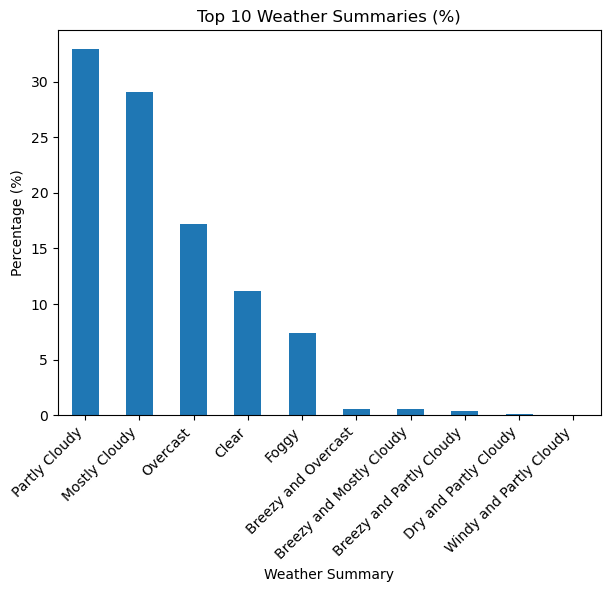

In [33]:
fig = plt.figure(figsize=(7,5)) 
ax = ( df['Summary']
    .value_counts(normalize=True)        # Calculates category ratios (divides by total rows, returns values between 0 and 1)
    .head(10)                            # Top 10 most frequent categories
    .mul(100)                            # Convert ratios to percentages
    .plot(kind='bar')                    # Draw a bar chart
)

ax.set_title("Top 10 Weather Summaries (%)")
ax.set_xlabel("Weather Summary")
ax.set_ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [34]:
# Correlation

In [35]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary', 'Day',
       'Month', 'Year', 'Hour'],
      dtype='object')

In [36]:
df_corr=df[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)']].corr()


In [37]:
df_corr

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271
Temperature (C),-0.563503,1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253
Apparent Temperature (C),-0.566058,0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037
Humidity,0.232622,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),-0.067771,0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),-0.042142,0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),-0.316483,0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),0.009271,-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000


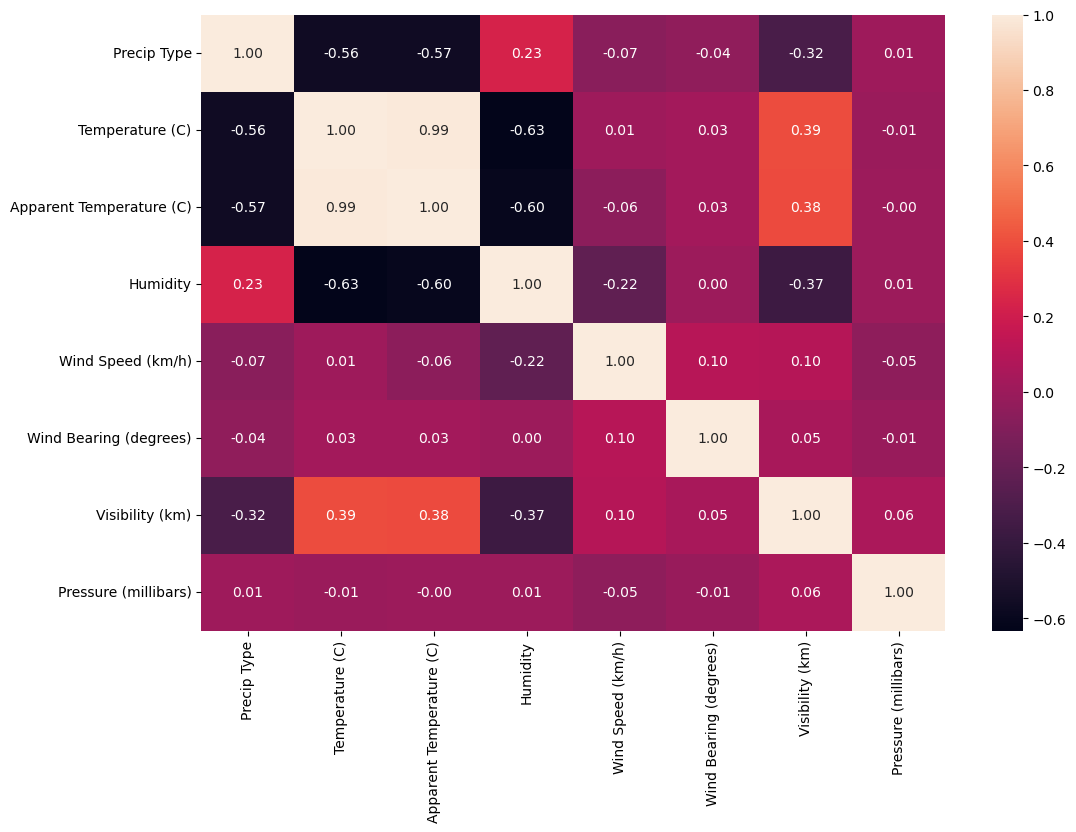

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, fmt=".2f") # fmt=".2f" → format with 2 decimal places
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  int64  
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Daily Summary             95936 non-null  object 
 10  Day                       95936 non-null  int32  
 11  Month                     95936 non-null  int32  
 12  Year                      95936 non-null  int32  
 13  Hour                      95936 non-null  int32  
dtypes: flo

In [40]:
# ----- Dependent and Independent Variables -------

In [41]:
X = df[["Humidity", 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y= df["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# --- 1. Simple model (without any hyperparameter tuning)---
tree_regr = DecisionTreeRegressor(
    random_state=15,
    max_depth=3,             # maximum depth of the tree
    #min_samples_split=50,   # minimum samples required to split a node
    #min_samples_leaf=20     # minimum samples required at a leaf node
)

tree_regr.fit(X_train, y_train)

y_pred = tree_regr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 5.355822412341736
MSE: 43.75034721139819
R²: 0.5239897310784842


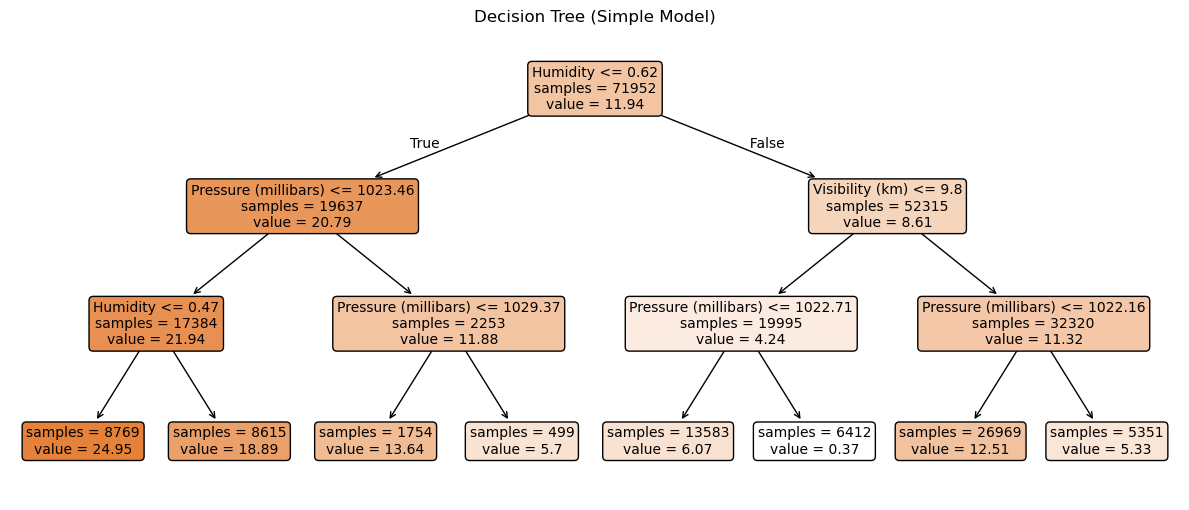

In [42]:
# Visualize the decision tree
plt.figure(figsize=(12,5))
plot_tree(tree_regr, feature_names=X_train.columns, filled=True, rounded=True, impurity=False, fontsize=10, precision=2)
plt.tight_layout()
plt.title("Decision Tree (Simple Model)", fontsize=12)
plt.show()

In [43]:
# Hyperparameter Tuning

In [44]:
params = {
    'criterion': ['squared_error'],       # only MSE
    'splitter': ['best'],                 # best split strategy
    'max_depth': [3, 5, 10],              # 3 different depth options
    'min_samples_split': [2, 10],         # 2 options
    'min_samples_leaf': [1, 5]            # 2 options
}

In [45]:
grid = GridSearchCV(
   estimator=DecisionTreeRegressor(random_state=15),  # base model (decision tree with fixed random state)
    param_grid=params,                                # dictionary of hyperparameters to try
    cv=3,                                             # 3-fold cross-validation
    scoring='r2',                                     # evaluation metric (R² score)
    n_jobs=-1                                         # use all available CPU cores
)

In [46]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=15), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10], 'splitter': ['best']},
             scoring='r2')

In [47]:
print("Best Params:", grid.best_params_)
print('---------')
print("Best R² Score:", grid.best_score_)

Best Params: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
---------
Best R² Score: 0.6196590580566085


In [48]:
# --- 2. Best model after GridSearch ---

tree_model_new = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    splitter='best',
    min_samples_leaf=5,
    min_samples_split=2
)

# max_depth was 10, but 4 was chosen for better readability (too many branches at 10).

In [49]:
tree_model_new.fit(X_train,y_train)

y_pred=tree_model_new.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 5.119301867936957
MSE: 40.29955064634247
R²: 0.5615349097027504


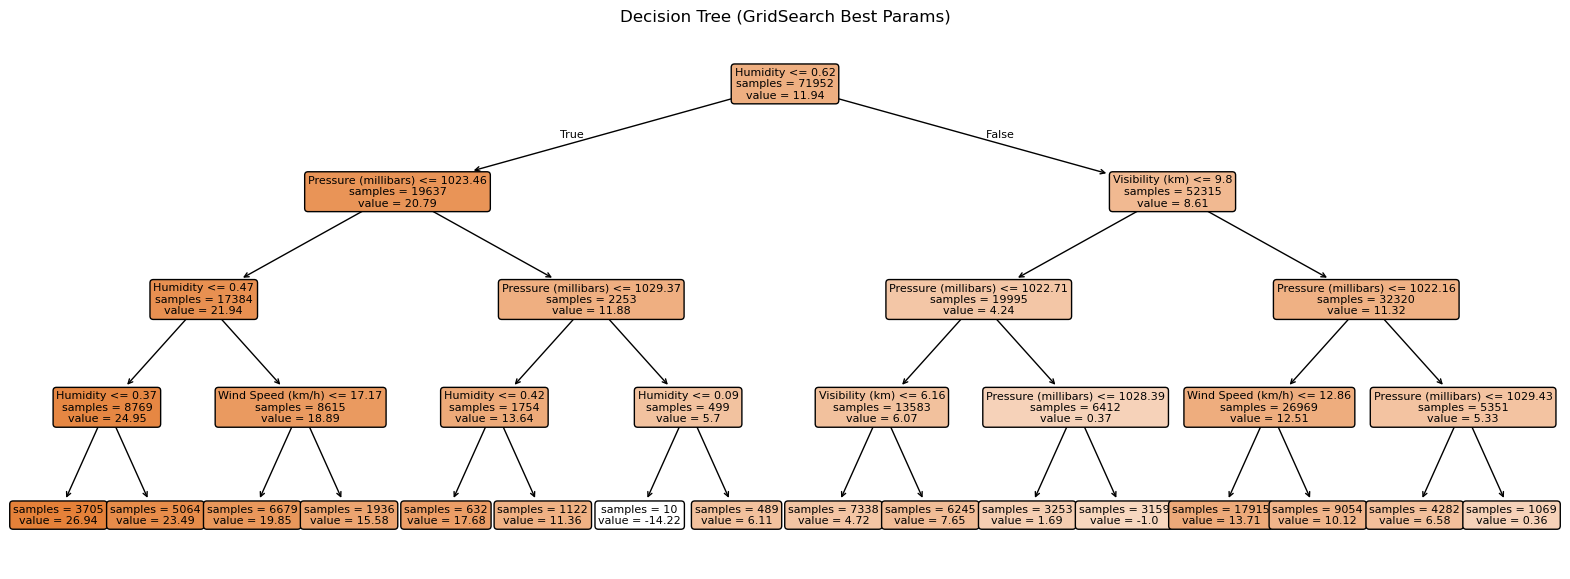

In [54]:
plt.figure(figsize=(20,7))

plot_tree(tree_model_new, feature_names=X_train.columns, filled=True, rounded=True, impurity=False, fontsize=8, precision=2)
plt.title("Decision Tree (GridSearch Best Params)", fontsize=12)
plt.show()